### 선형회귀 이해하기
- 성적 데이터를 기반으로 선형회귀를 이해해보자

In [289]:
# 성적 데이터 생성을 위한 라이브러리 꺼내오기
import pandas as pd
import matplotlib.pyplot as plt

In [290]:
# 성적 데이터 생성
data=pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
            index=['강진구','김동영','안현진','박현우'],
            columns=['시간','성적'])
data

,시간,성적
강진구,2,20
김동영,4,40
안현진,8,80
박현우,9,90


In [291]:
data[['시간']]

,시간
강진구,2
김동영,4
안현진,8
박현우,9


In [292]:
data['성적']

강진구    20
김동영    40
안현진    80
박현우    90
Name: 성적, dtype: int64

#### 수학 공식을 이용한 해석적 모델
- LinearRegression

In [293]:
from sklearn.linear_model import LinearRegression

# 모델 생성, 하이퍼파라미터 설정 X 
linear_model=LinearRegression()

# 학습 
linear_model.fit(data[['시간']],data['성적']) # 문제는 2차원, 정답은 1차원 

LinearRegression()

##### y = ax + b (문제가 1 개 일 때의 선형함수)

In [294]:
# 기울기 (a), 가중치 (w) 출력
print('기울기, 가중치 : ', linear_model.coef_)

# 절편, 편향 (b) 출력 
print('절편, 편향 : ', linear_model.intercept_)

기울기, 가중치 :  [10.]
절편, 편향 :  7.105427357601002e-15


In [295]:
# 원서씨가 7 시간 공부했을 때 몇 점? => 예측 
linear_model.predict([[7]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

#### 경사하강법
- 가중치 (w) 의 변화에 따른 비용함수 (cost) 값의 변화 그래프 
- 점진적으로 오차가 작은 선형함수를 찾아가는 방법


##### H(x) : 가설함수 

In [296]:
# 함수 정의 
def h(w,x):
    return 0.4*w*x+0

##### Cost function 
- cost : 비용 => 오차 

In [297]:
# 비용함수 정의 
# 문제값, 실제값 (정답), 가중치 

def cost(data,target,weight):
    # 예측 값
    y_pre=h(weight,data)
    # cost 값 (오차) : ((예측값 - 실제값) ** 2).평균함수() => 평균제곱오차 (중요) 
    error=((y_pre-target)**2).mean()
    return error

In [299]:
# 가중치에 따른 오차값 확인 
cost(data['시간'],data['성적'],10)

1485.0

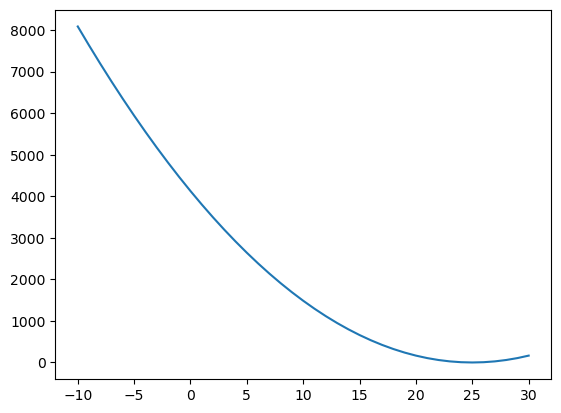

In [300]:
# 가중치 변화에 따른 비용함수의 변화를 그래프로 그려보자
# 1. 가중치 변화값 저장 
cost_list=[]
for w in range(-10,31): # -10 ~ 30 까지 가중치 변화 
    err=cost(data['시간'],data['성적'],w)
    cost_list.append(err)

# 2. 저장된 값을 이용해서 그래프로 시각화 
plt.plot(range(-10,31),cost_list)
plt.show()

In [301]:
# 분류모델 score : 정확도 
# 회귀모델 score : R2score => 유사도 
linear_model.score(data[['시간']],data['성적'])

1.0

##### SGDRegressor 

In [302]:
from sklearn.linear_model import SGDRegressor

# 모델 생성, 하이퍼파라미터 설정 
sgd_model=SGDRegressor(max_iter=5000, # 가중치 업데이트 반복 횟수 (epoch)
                       eta0=0.001,    # 학습률 (가중치 변동폭)
                       verbose=1)     # 학습 과정 확인 

# 학습 
sgd_model.fit(data[['시간']],data['성적'])

-- Epoch 1
Norm: 1.43, NNZs: 1, Bias: 0.190085, T: 4, Avg. loss: 1872.560293
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.26, NNZs: 1, Bias: 0.307908, T: 8, Avg. loss: 1412.272017
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.96, NNZs: 1, Bias: 0.403684, T: 12, Avg. loss: 1152.526950
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.53, NNZs: 1, Bias: 0.483377, T: 16, Avg. loss: 954.056572
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.03, NNZs: 1, Bias: 0.552358, T: 20, Avg. loss: 804.546471
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.47, NNZs: 1, Bias: 0.612827, T: 24, Avg. loss: 682.834704
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.86, NNZs: 1, Bias: 0.666449, T: 28, Avg. loss: 585.478493
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.20, NNZs: 1, Bias: 0.714580, T: 32, Avg. loss: 503.958674
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.52, NNZs: 1, Bias: 0.757842, T: 36, Avg. loss: 436.796349
Total training time: 0.00 

SGDRegressor(eta0=0.001, max_iter=5000, verbose=1)

In [303]:
# 예측 
sgd_model.predict([[7]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([69.88317042])

In [304]:
# 가중치 (w), 편향 (b) 확인하기 
print(sgd_model.coef_)
print(sgd_model.intercept_)

[9.7943932]
[1.32241804]


In [305]:
sgd_model.score(data[['시간']],data['성적'])
# 1 에 가까울수록 모델이 예측한 성능이 높다고 판단 
# 모델의 예측 성능을 판단하는 기준 

0.9995532582690322